In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('airlines_flights_data.csv')

In [6]:
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [8]:
df.shape

(300153, 12)

In [10]:
df.columns

Index(['index', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [14]:
df.isna().sum()

index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [16]:
airline_counts = df['airline'].value_counts()
print(airline_counts)

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64


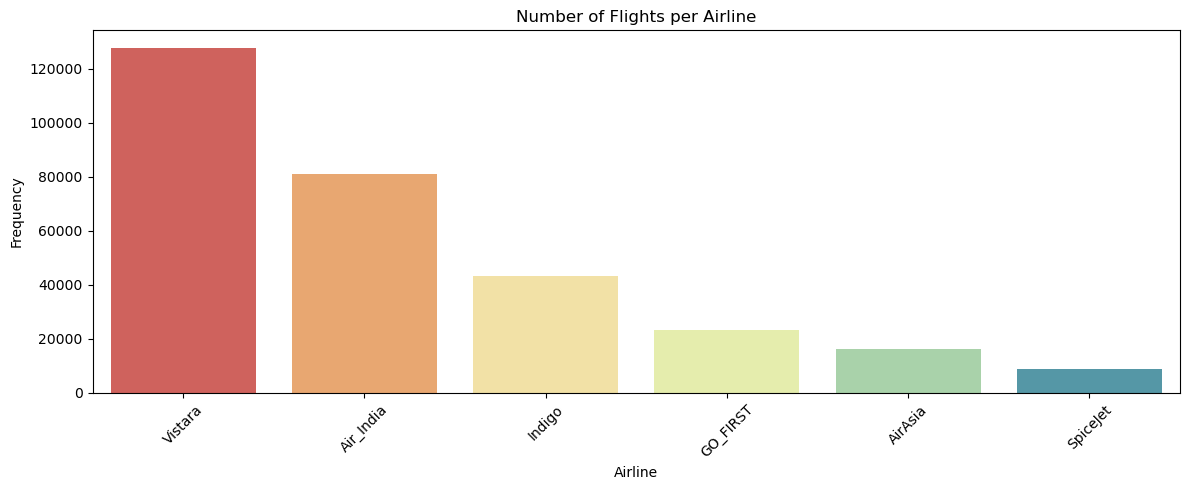

In [50]:
airline_df = airline_counts.reset_index()
airline_df.columns = ['Airline', 'Frequency']

plt.figure(figsize=(12, 5))
sns.barplot(data=airline_df, x='Airline',hue='Airline', y='Frequency', palette='Spectral')

plt.title("Number of Flights per Airline")
plt.xlabel("Airline")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Departure Time Distribution:
 departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64


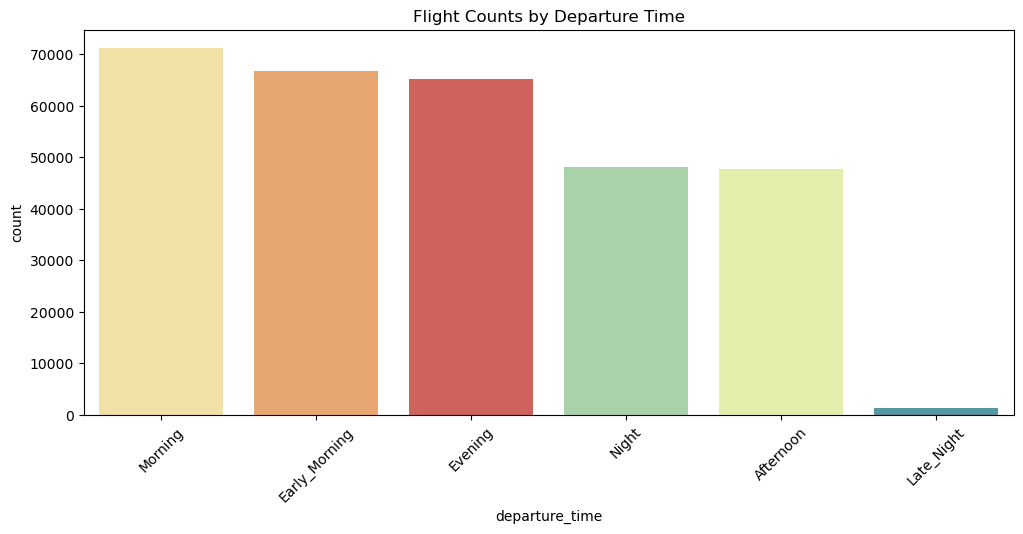

In [58]:
departure_counts = df['departure_time'].value_counts()
print("Departure Time Distribution:\n", departure_counts)

plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='departure_time',hue='departure_time',palette='Spectral', order=df['departure_time'].value_counts().index)
plt.title("Flight Counts by Departure Time")
plt.xticks(rotation=45)
plt.show()
#Morning and evening are peak time so airport authorities can be careful about congestion during these times.

Arrival Time Distribution:
 arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64


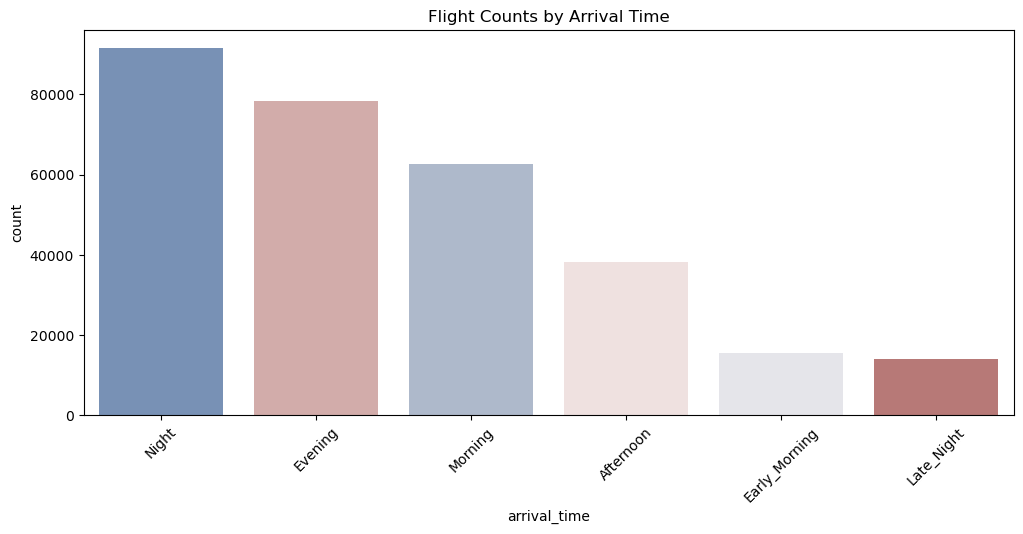

In [60]:
arrival_counts = df['arrival_time'].value_counts()
print("Arrival Time Distribution:\n", arrival_counts)

plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='arrival_time',hue='arrival_time',palette='vlag', order=df['arrival_time'].value_counts().index)
plt.title("Flight Counts by Arrival Time")
plt.xticks(rotation=45)
plt.show()

Source City Distribution:
 source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64


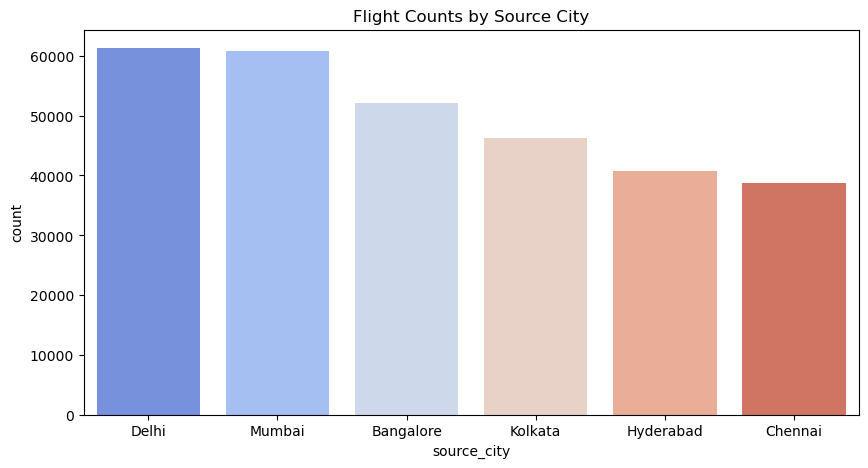

In [62]:
source_counts = df['source_city'].value_counts()
print("Source City Distribution:\n", source_counts)

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='source_city',hue='source_city',palette='coolwarm', order=df['source_city'].value_counts().index)
plt.title("Flight Counts by Source City")
plt.show()

Destination City Distribution:
 destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64


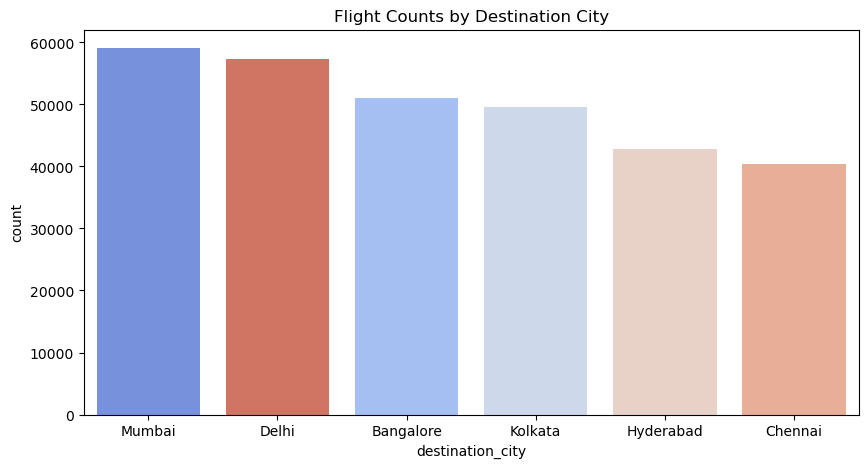

In [64]:
dest_counts = df['destination_city'].value_counts()
print("Destination City Distribution:\n", dest_counts)

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='destination_city',hue='destination_city',palette='coolwarm',  order=df['destination_city'].value_counts().index)
plt.title("Flight Counts by Destination City")
plt.show()

Average Price by Airline:
 airline
AirAsia       4091.072742
Indigo        5324.216303
GO_FIRST      5652.007595
SpiceJet      6179.278881
Air_India    23507.019112
Vistara      30396.536302
Name: price, dtype: float64


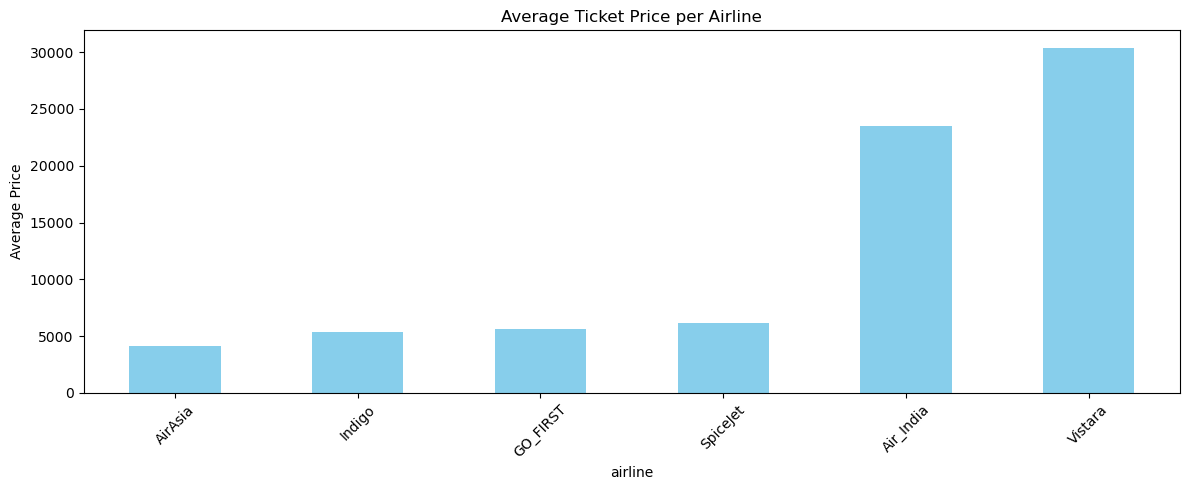

In [66]:
airline_price = df.groupby('airline')['price'].mean().sort_values()
print("Average Price by Airline:\n", airline_price)

plt.figure(figsize=(12, 5))
airline_price.plot(kind='bar', color='skyblue')
plt.title("Average Ticket Price per Airline")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Average Price by Departure Time:
 departure_time
Late_Night        9295.299387
Afternoon        18179.203331
Early_Morning    20370.676718
Evening          21232.361894
Morning          21630.760254
Night            23062.146808
Name: price, dtype: float64


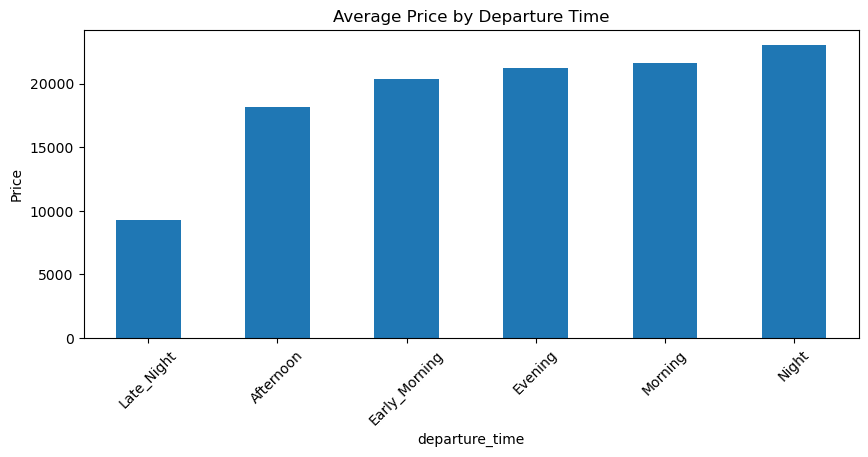

In [72]:
dep_price = df.groupby('departure_time')['price'].mean().sort_values()
print("Average Price by Departure Time:\n", dep_price)

plt.figure(figsize=(10, 4))
dep_price.plot(kind='bar')
plt.title("Average Price by Departure Time")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

Average Price by Arrival Time:
 arrival_time
Late_Night       11284.906078
Early_Morning    14993.139521
Afternoon        18494.598993
Night            21586.758341
Morning          22231.076098
Evening          23044.371615
Name: price, dtype: float64


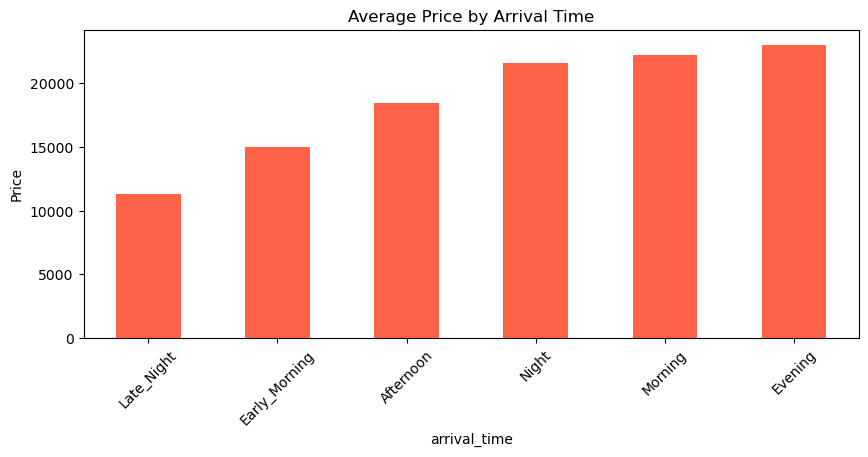

In [70]:
arr_price = df.groupby('arrival_time')['price'].mean().sort_values()
print("Average Price by Arrival Time:\n", arr_price)

plt.figure(figsize=(10, 4))
arr_price.plot(kind='bar', color='tomato')
plt.title("Average Price by Arrival Time")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

Average Price by Source City:
 source_city
Delhi        18951.326639
Hyderabad    20155.623879
Bangalore    21469.460575
Mumbai       21483.818839
Kolkata      21746.235679
Chennai      21995.339871
Name: price, dtype: float64


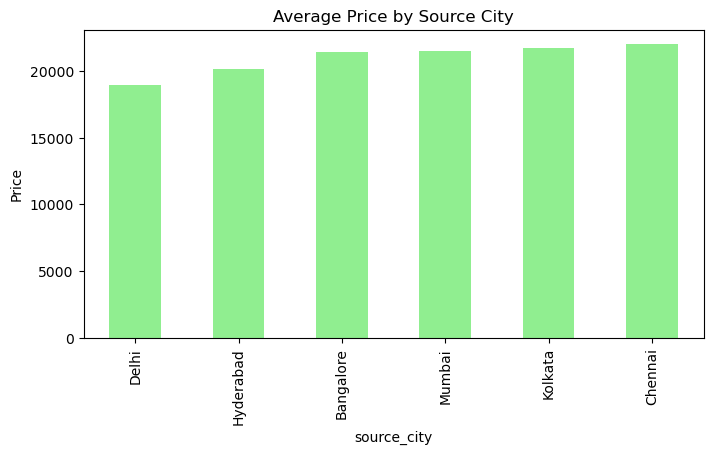

In [74]:
src_price = df.groupby('source_city')['price'].mean().sort_values()
print("Average Price by Source City:\n", src_price)

plt.figure(figsize=(8, 4))
src_price.plot(kind='bar', color='lightgreen')
plt.title("Average Price by Source City")
plt.ylabel("Price")
plt.show()

Average Price by Destination City:
 destination_city
Delhi        18436.767870
Hyderabad    20427.661284
Mumbai       21372.529469
Bangalore    21593.955784
Chennai      21953.323969
Kolkata      21959.557556
Name: price, dtype: float64


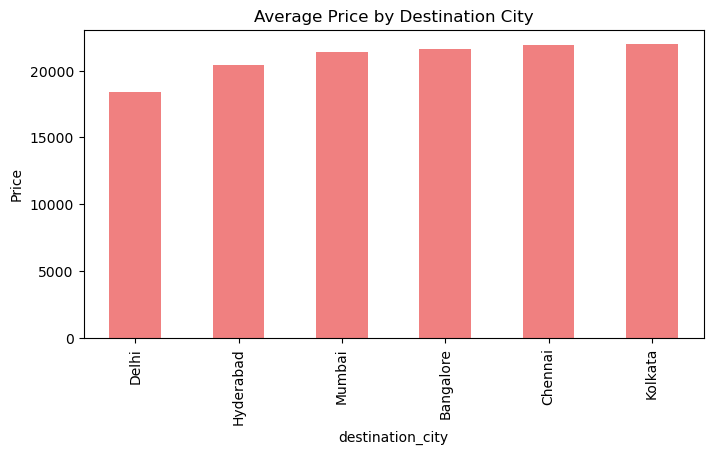

In [76]:
dest_price = df.groupby('destination_city')['price'].mean().sort_values()
print("Average Price by Destination City:\n", dest_price)

plt.figure(figsize=(8, 4))
dest_price.plot(kind='bar', color='lightcoral')
plt.title("Average Price by Destination City")
plt.ylabel("Price")
plt.show()

Top 5 Most Expensive Routes:
 route
Chennai ➝ Bangalore    25081.850454
Kolkata ➝ Chennai      23660.361040
Bangalore ➝ Kolkata    23500.061229
Bangalore ➝ Chennai    23321.850078
Mumbai ➝ Bangalore     23147.873807
Name: price, dtype: float64


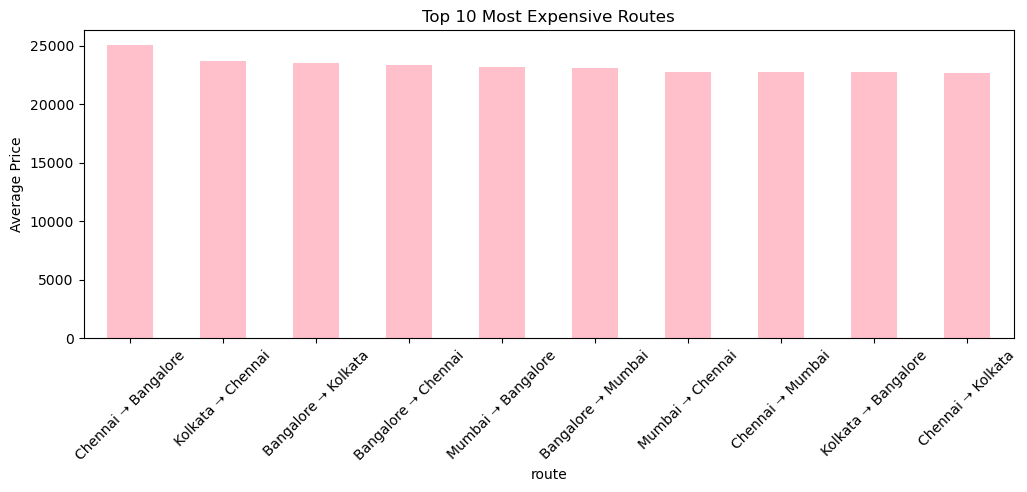

In [112]:
df['route'] = df['source_city'] + " ➝ " + df['destination_city']
route_price = df.groupby('route')['price'].mean().sort_values(ascending=False)

print("Top 5 Most Expensive Routes:\n", route_price.head())

route_price.head(10).plot(kind='bar', figsize=(12, 4), color='pink')
plt.title("Top 10 Most Expensive Routes")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

Tickets bought 1-2 days before departure:  5953
Average Price (1-2 days before): 27421.169326390056
Overall Average Price: 20889.660523133203


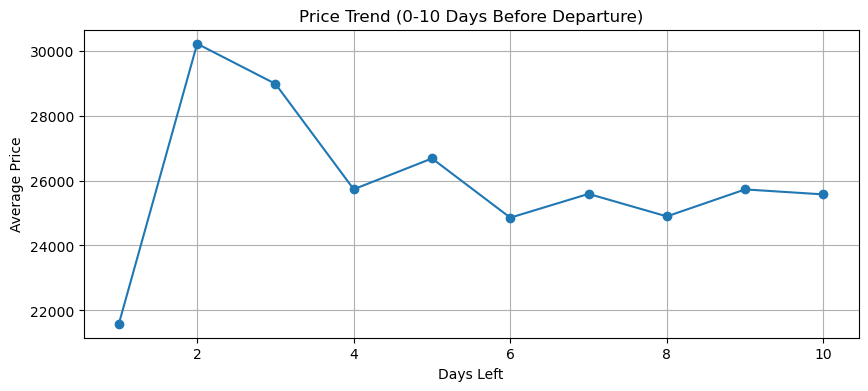

In [78]:
last_min = df[df['days_left'].isin([1, 2])]
print("Tickets bought 1-2 days before departure: ", len(last_min))
print("Average Price (1-2 days before):", last_min['price'].mean())
print("Overall Average Price:", df['price'].mean())

subset = df[df['days_left'] <= 10]
avg_price_days = subset.groupby('days_left')['price'].mean()

plt.figure(figsize=(10, 4))
avg_price_days.plot(kind='line', marker='o')
plt.title("Price Trend (0-10 Days Before Departure)")
plt.xlabel("Days Left")
plt.ylabel("Average Price")
plt.grid(True)
plt.show()
#We can see that tickets should be booked atleast 6 days prior to flight to get reasonable price.

Average Price by Class:
 class
Business    52540.081124
Economy      6572.342383
Name: price, dtype: float64


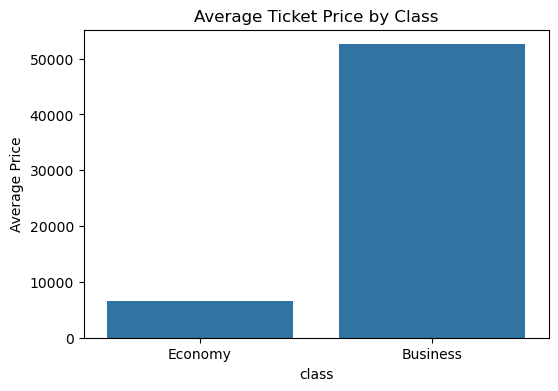

In [82]:
class_avg_price = df.groupby('class')['price'].mean()
print("Average Price by Class:\n", class_avg_price)

plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='class', y='price', estimator='mean', errorbar=None)
plt.title("Average Ticket Price by Class")
plt.ylabel("Average Price")
plt.show()
#Business class is 10 times expensive than economy.

In [84]:
query = (
    (df['airline'] == 'Vistara') &
    (df['source_city'] == 'Delhi') &
    (df['destination_city'] == 'Hyderabad') &
    (df['class'] == 'Business')
)
vistara_avg = df[query]['price'].mean()
print(f"Average Vistara Business Price from Delhi to Hyderabad: ₹{vistara_avg:.2f}")


Average Vistara Business Price from Delhi to Hyderabad: ₹47939.84


Flight Frequency by Number of Stops:
 stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

Average Price by Stops:
 stops
zero            9375.938535
two_or_more    14113.450775
one            22900.992482
Name: price, dtype: float64


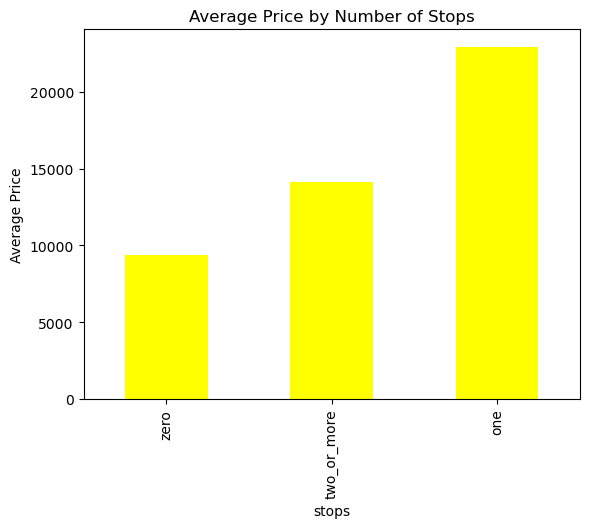

In [110]:
stop_counts = df['stops'].value_counts()
print("Flight Frequency by Number of Stops:\n", stop_counts)

stop_price = df.groupby('stops')['price'].mean().sort_values()
print("\nAverage Price by Stops:\n", stop_price)

# Plot
stop_price.plot(kind='bar', color='yellow')
plt.title("Average Price by Number of Stops")
plt.ylabel("Average Price")
plt.show()
#Direct flights are cheaper than connecting mainly due to long distance.

Top 5 Most Frequent Routes:
 route
Delhi ➝ Mumbai        15289
Mumbai ➝ Delhi        14809
Delhi ➝ Bangalore     14012
Bangalore ➝ Delhi     13756
Bangalore ➝ Mumbai    12939
Name: count, dtype: int64


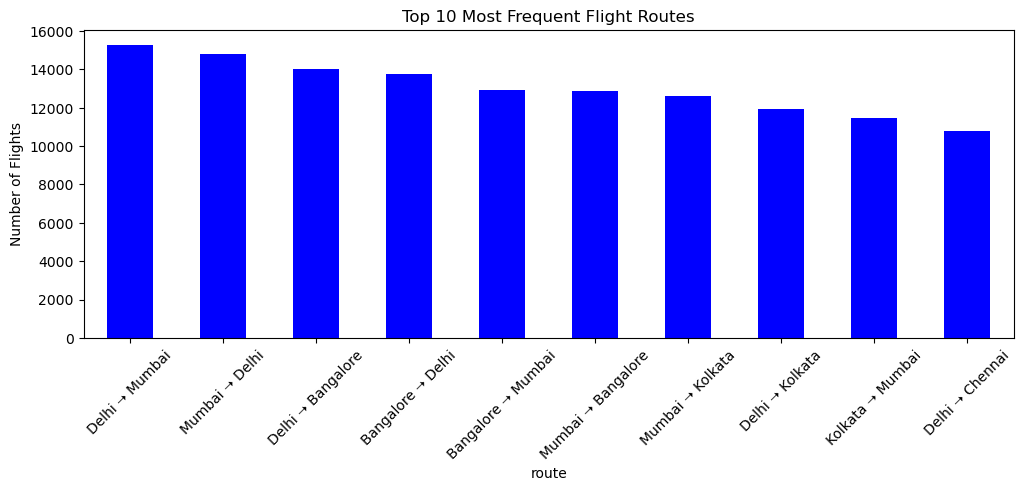

In [100]:
city_pair_counts = df['route'].value_counts()
print("Top 5 Most Frequent Routes:\n", city_pair_counts.head())

city_pair_counts.head(10).plot(kind='bar', figsize=(12, 4), color='blue')
plt.title("Top 10 Most Frequent Flight Routes")
plt.ylabel("Number of Flights")
plt.xticks(rotation=45)
plt.show()